In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc

%matplotlib inline

import rtbm.layers as layers
import rtbm.model as mdl

import warnings
warnings.filterwarnings('ignore')

from rtbm.costfunctions import mse
from rtbm import minimizer

from rtbm.mathtools import factorized_hidden_expectations, hidden_expectations
from rtbm.mathtools import gradient_log_theta, gradient_log_1d_theta_phaseI #, gradient_log_theta_phaseI_NEW

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed',)).History will not be written to the database.


In [2]:
# Generate input grid
X = np.linspace(-10,10, 101)
X = X.reshape((1,X.shape[0]))

# E(h_i|v) diagonal Q

# Linear periodicity relation tests

In [3]:
Q = np.diag([69])

X = np.linspace(-100,100, 50)
X = X.reshape((1,X.shape[0]))

#print(gradient_log_theta_phaseI(X.T -Q*60, Q, 0))

#print(gradient_log_theta(X.T, Q, 0)+60)

print(gradient_log_theta(X.T, Q, 0))

#print(gradient_log_theta_phaseI(X.T, Q, 0))


[ 1.+6.12323400e-17j  1.+6.12323400e-17j  1.+6.12323400e-17j
  1.+6.12323400e-17j  1.+6.12323400e-17j  1.+6.12323400e-17j
  1.+6.12323400e-17j  1.+6.12323400e-17j  1.+6.12323400e-17j
  1.+6.12323400e-17j  1.+6.12323400e-17j  1.+6.12323400e-17j
  1.+6.12323400e-17j  1.+6.12323400e-17j  1.+6.12323400e-17j
  1.+6.12323400e-17j  1.+6.12323400e-17j -0.+0.00000000e+00j
 -0.+0.00000000e+00j -0.+0.00000000e+00j -0.+0.00000000e+00j
 -0.+0.00000000e+00j -0.+0.00000000e+00j -0.+0.00000000e+00j
 -0.+0.00000000e+00j -0.+0.00000000e+00j -0.+0.00000000e+00j
 -0.+0.00000000e+00j -0.+0.00000000e+00j -0.+0.00000000e+00j
 -0.+0.00000000e+00j -0.+0.00000000e+00j -0.+0.00000000e+00j
 -1.+6.12323400e-17j -1.+6.12323400e-17j -1.+6.12323400e-17j
 -1.+6.12323400e-17j -1.+6.12323400e-17j -1.+6.12323400e-17j
 -1.+6.12323400e-17j -1.+6.12323400e-17j -1.+6.12323400e-17j
 -1.+6.12323400e-17j -1.+6.12323400e-17j -1.+6.12323400e-17j
 -1.+6.12323400e-17j -1.+6.12323400e-17j -1.+6.12323400e-17j
 -1.+6.12323400e-17j -1.

In [4]:
Q = np.zeros((2,2))
Q[0,0] = 1.5
Q[1,0] = -1.4
Q[0,1] = 1.4
Q[1,1] = 1.7


X1 = np.linspace(-60,60, 21)
X2 = np.linspace(-60,65, 21)

X=np.stack((X1,X2))

print(gradient_log_theta(X.T, Q, 0))
#gradient_log_theta_phaseI_NEW(X.T, Q, 0)

[ 3.99112555+2.44385957e-16j  3.66962122+2.24699494e-16j
  3.34812326+2.05013422e-16j  3.02659776+1.85325663e-16j
  2.70510610+1.65639976e-16j  2.38359257+1.45952950e-16j
  2.06207713+1.26265808e-16j  1.74058635+1.06580175e-16j
  1.41906147+8.68924546e-17j  1.09756173+6.72062730e-17j
  0.77605938+4.75199316e-17j  0.45453570+2.78322847e-17j
  0.13304577+8.14670394e-18j -0.18847211+1.15405883e-17j
 -0.50998292+3.12274476e-17j -0.83147611+5.09132276e-17j
 -1.15300210+7.06010166e-17j -1.47449781+9.02869512e-17j
 -1.79600493+1.09973585e-16j -2.11752568+1.29661052e-16j
 -2.43901512+1.49346603e-16j]


In [5]:
Q = np.zeros((2,2))
Q[0,0] = 2
Q[1,0] = 0.13
Q[0,1] = 0.14
Q[1,1] = 1


X1 = np.linspace(-100,100, 100)
X2 = np.linspace(-100,100, 100)


X=np.stack((X1,X2))

n=np.zeros((2,1))
n[0,0]=2
n[1,0]=2

R=np.repeat(Q.dot(n),X.shape[1],axis=1)

R.shape
print(gradient_log_theta(X.T, Q, 0))
print(gradient_log_theta(X.T-R.T, Q, 0))-2


[ 43.39470874+2.65715956e-15j  42.51826354+2.60349277e-15j
  41.64179863+2.54982477e-15j  40.76520000+2.49614858e-15j
  39.88843009+2.44246191e-15j  39.01154907+2.38876843e-15j
  38.13468055+2.33507572e-15j  37.25794102+2.28139091e-15j
  36.38137334+2.22771662e-15j  35.50492224+2.17404947e-15j
  34.62846578+2.12038199e-15j  33.75188518+2.06670691e-15j
  32.87513252+2.01302129e-15j  31.99825814+1.95932822e-15j
  31.12138188+1.90563504e-15j  30.24462464+1.85194914e-15j
  29.36803939+1.79827377e-15j  28.49158089+1.74460617e-15j
  27.61513144+1.69093912e-15j  26.73856824+1.63726510e-15j
  25.86183343+1.58358058e-15j  24.98496718+1.52988800e-15j
  24.10808467+1.47619444e-15j  23.23131038+1.42250749e-15j
  22.35470700+1.36883102e-15j  21.47823967+1.31516287e-15j
  20.60179573+1.26149616e-15j  19.72524921+1.20782317e-15j
  18.84853274+1.15413976e-15j  17.97167601+1.10044778e-15j
  17.09478878+1.04675392e-15j  16.21799820+9.93065979e-16j
  15.34137629+9.39388368e-16j  14.46489875+8.85719598e-1

# Phase I

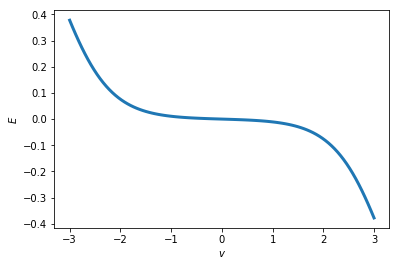

In [6]:
# Setup and plot expectation
Q = np.diag([13])
B = np.zeros((1,1))
B[0,0] = 0
W = np.zeros((1,1))
W[0,0] = 2

X = np.linspace(-3,3, 101)
X = X.reshape((1,X.shape[0]))
E=factorized_hidden_expectations(X, B, W, Q, True)

#plt.rc('text', usetex=True)
#plt.rc('font', family='serif')

plt.xlabel("$v$")
plt.ylabel("$E$")
plt.plot(X.flatten(), E[0],"-", linewidth='3')

#plt.savefig("EhvPhaseI-1.eps", format="eps")

In [7]:
E

array([[ 3.77538313e-01+0.j,  3.49778466e-01+0.j,  3.23000485e-01+0.j,
         2.97334961e-01+0.j,  2.72886609e-01+0.j,  2.49733856e-01+0.j,
         2.27929462e-01+0.j,  2.07502018e-01+0.j,  1.88458117e-01+0.j,
         1.70784974e-01+0.j,  1.54453305e-01+0.j,  1.39420289e-01+0.j,
         1.25632452e-01+0.j,  1.13028384e-01+0.j,  1.01541188e-01+0.j,
         9.11006432e-02+0.j,  8.16350377e-02+0.j,  7.30726922e-02+0.j,
         6.53431782e-02+0.j,  5.83782627e-02+0.j,  5.21126095e-02+0.j,
         4.64842698e-02+0.j,  4.14349974e-02+0.j,  3.69104189e-02+0.j,
         3.28600884e-02+0.j,  2.92374526e-02+0.j,  2.59997474e-02+0.j,
         2.31078454e-02+0.j,  2.05260688e-02+0.j,  1.82219812e-02+0.j,
         1.61661662e-02+0.j,  1.43320024e-02+0.j,  1.26954390e-02+0.j,
         1.12347768e-02+0.j,  9.93045749e-03+0.j,  8.76486357e-03+0.j,
         7.72212897e-03+0.j,  6.78796215e-03+0.j,  5.94948118e-03+0.j,
         5.19506059e-03+0.j,  4.51418969e-03+0.j,  3.89734158e-03+0.j,
      

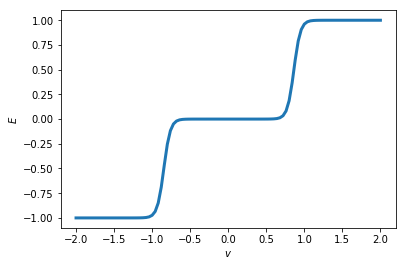

In [8]:
Q = np.diag([40])
B = np.zeros((1,1))
B[0,0] = 0.2
W = np.zeros((1,1))
W[0,0] = -0.18*130

X = np.linspace(-2,2, 101)
X = X.reshape((1,X.shape[0]))

E=factorized_hidden_expectations(X, B, W, Q, True)

plt.xlabel("$v$")
plt.ylabel("$E$")
plt.plot(X.flatten(), E[0],"-", linewidth='3')

plt.savefig("EhvPhaseI-2.eps", format="eps")

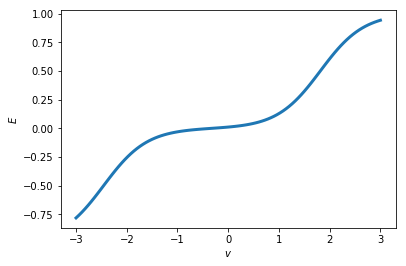

In [9]:
Q = np.diag([10])
B = np.zeros((1,1))
B[0,0] = -0.75
W = np.zeros((1,1))
W[0,0] = -0.18*13

X = np.linspace(-3,3, 101)
X = X.reshape((1,X.shape[0]))

E=factorized_hidden_expectations(X, B, W, Q, True)
plt.xlabel("$v$")
plt.ylabel("$E$")
plt.plot(X.flatten(), E[0],"-", linewidth='3')

plt.savefig("EhvPhaseI-3.eps", format="eps")

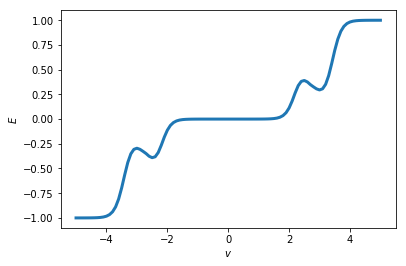

In [10]:
# Non-diagonal

Q = np.zeros((2,2))
Q[0,0] = 30
Q[1,0] = -7
Q[0,1] = -1
Q[1,1] = 38
B = np.zeros((2,1))
B[0,0] = 0
B[1,0] = 0
W = np.zeros((1,2))
W[0,0] = -5.4
W[0,1] = 8.2


X = np.linspace(-5,5, 101)
X = X.reshape((1,X.shape[0]))

E=hidden_expectations(X, B, W, Q)


plt.xlabel("$v$")
plt.ylabel("$E$")
plt.plot(X.flatten(), E[0],"-", linewidth='3')



# Phase II

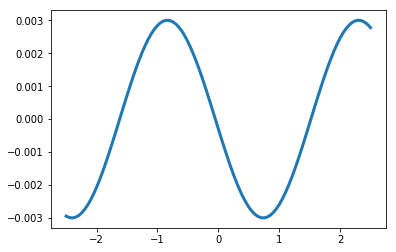

In [11]:
Q = np.diag([13])
B = np.zeros((1,1), dtype=complex)
B[0,0] = 0.1j
W = np.zeros((1,1), dtype=complex)
W[0,0] = 2j

X = np.linspace(-2.5,2.5, 101)
X = X.reshape((1,X.shape[0]))
E=factorized_hidden_expectations(X, B, W, Q)

plt.plot(X.flatten(), -1j*E[0],"-", linewidth='3')

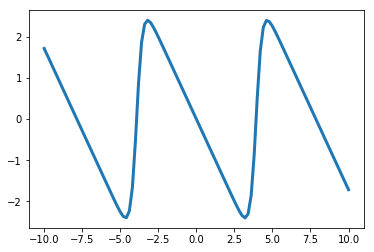

In [12]:
Q = np.diag([1])
B = np.zeros((1,1), dtype=complex)
B[0,0] = 0j
W = np.zeros((1,1), dtype=complex)
W[0,0] = 0.8j

X = np.linspace(-10,10, 101)
X = X.reshape((1,X.shape[0]))
E=factorized_hidden_expectations(X, B, W, Q)

plt.plot(X.flatten(), -1j*E[0],"-", linewidth='3')

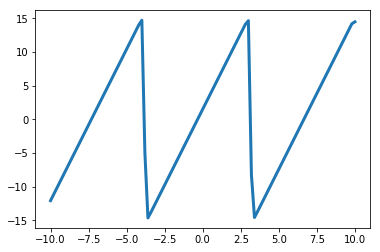

In [13]:
Q = np.diag([0.2])
B = np.zeros((1,1), dtype=complex)
B[0,0] = -0.3j
W = np.zeros((1,1), dtype=complex)
W[0,0] = -0.9j

X = np.linspace(-10,10, 101)
X = X.reshape((1,X.shape[0]))
E=factorized_hidden_expectations(X, B, W, Q)

plt.plot(X.flatten(), -1j*E[0],"-", linewidth='3')

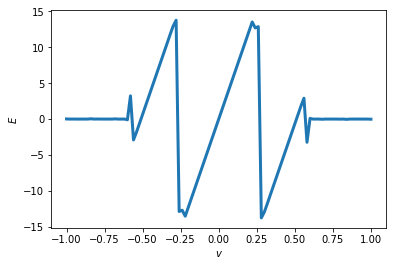

In [14]:
# Non-diagonal

Q = np.zeros((2,2))
Q[0,0] = 1.2
Q[1,0] = -0.1
Q[0,1] = -0.1
Q[1,1] = 0.01
B = np.zeros((2,1), dtype=complex)
B[0,0] = 0
B[1,0] = 0
W = np.zeros((1,2), dtype=complex)
W[0,0] = 0.7j
W[0,1] = -1.3j


X = np.linspace(-1,1, 101)
X = X.reshape((1,X.shape[0]))

E=hidden_expectations(X, B, W, Q)


plt.xlabel("$v$")
plt.ylabel("$E$")
plt.plot(X.flatten(), -1j*E[0],"-", linewidth='3')


In [15]:
# Note: Check non-vanishing real/im parts (ROUNDING ERROR ?)